In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


## Comprehensive Scikit-Learn Tutorial

This tutorial covers essential machine learning techniques using Scikit-Learn, with placeholders for students to fill in the missing code.

Topics covered:
- Data Preprocessing
- Supervised Learning (Classification & Regression)
- Model Evaluation and Validation

Dataset: We will use the Iris dataset as an example.



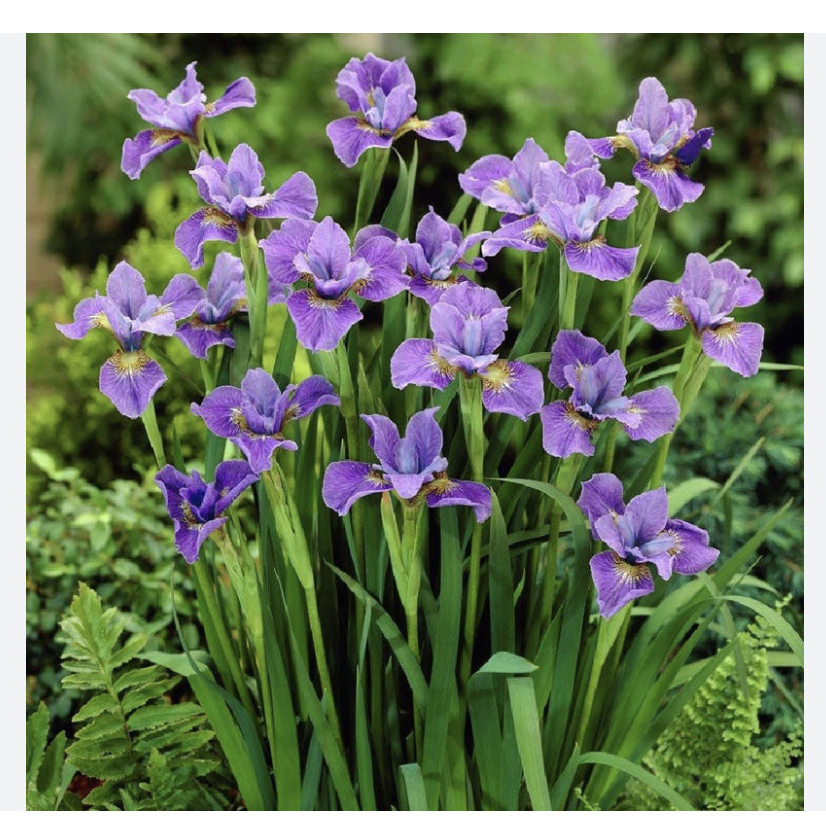

In [31]:


# Load dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target labels
df['species'] = iris.target




In [32]:
# Display first few rows
df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [33]:
# Basic info and statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [34]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [35]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

<Figure size 1200x600 with 0 Axes>

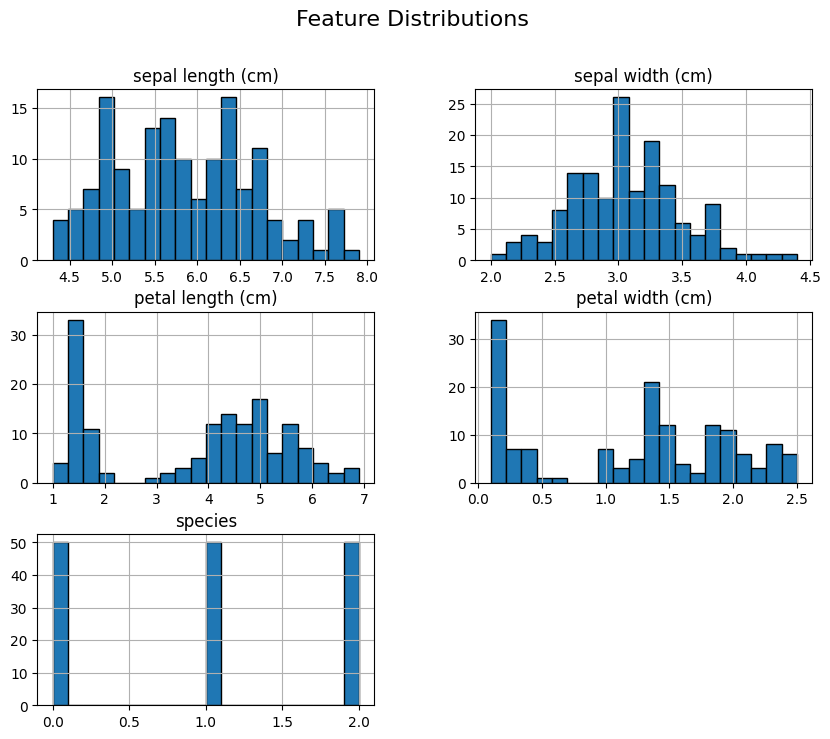

In [36]:
# Visualizing distribution of features
plt.figure(figsize=(12, 6))
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

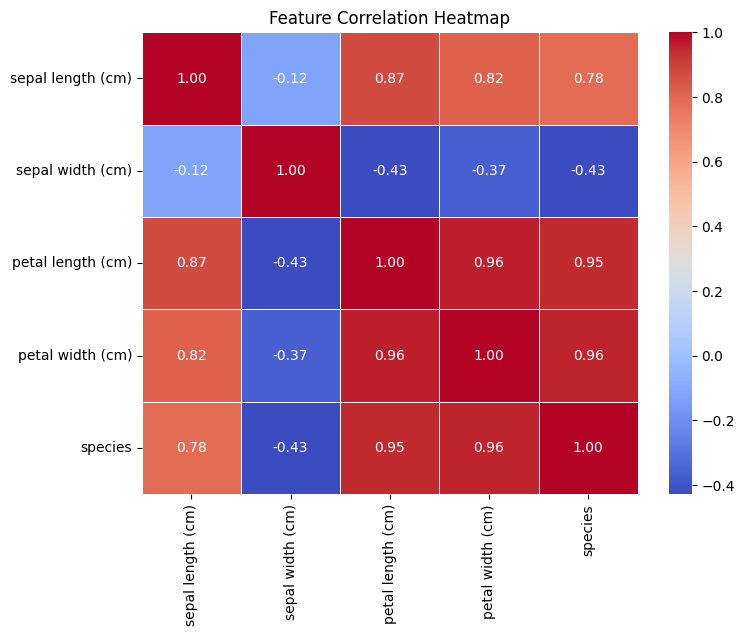

In [37]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

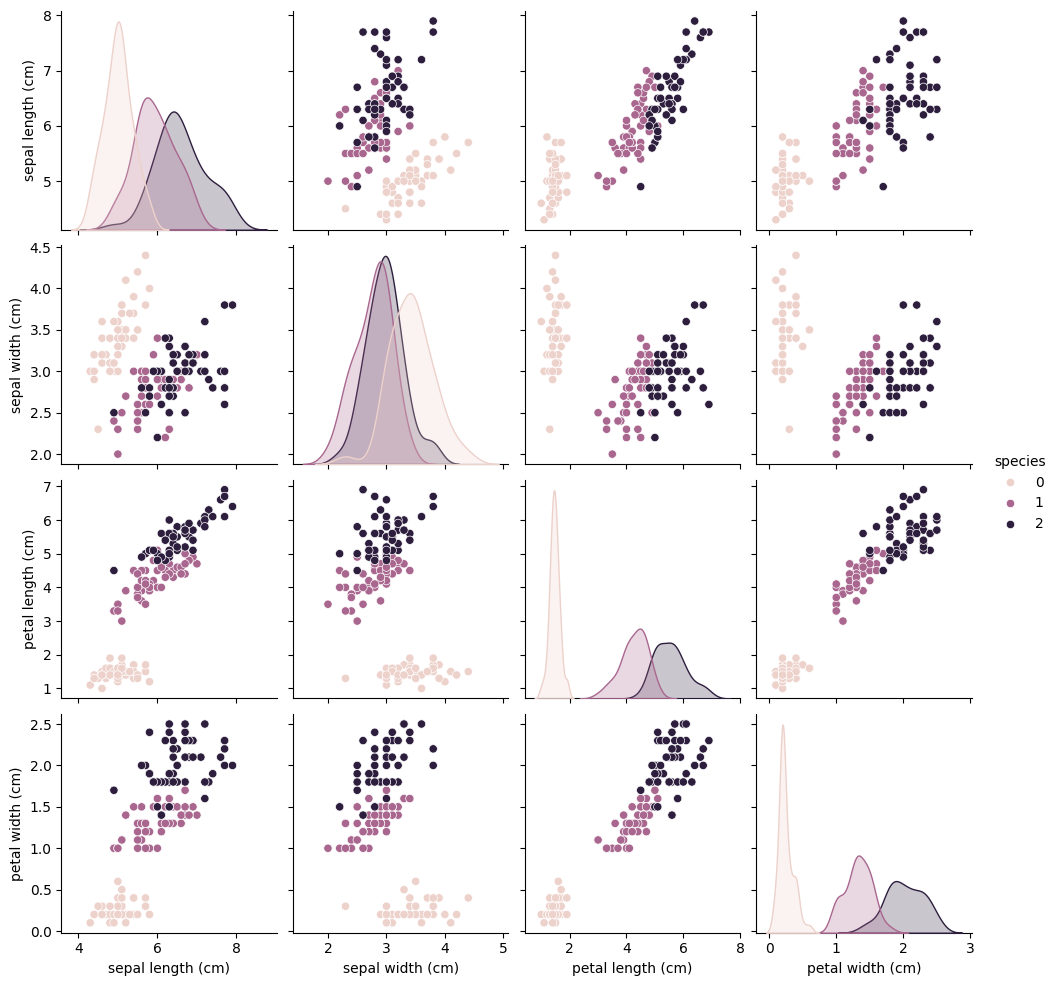

In [38]:
# Pairplot to visualize relationships
sns.pairplot(df, hue="species", diag_kind="kde")
plt.show()

"""
## Data Preprocessing
1. Extract features (X) and labels (y)
2. Split dataset into training and testing sets
3. Scale the features (optional but recommended)
"""

In [39]:
# Extract features and labels
X = df.drop(columns=['species'])  # Features
y = df['species']  # Target

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# -Nearest Neighbors (KNN)

#k-nearest neighbors
is a supervised classification algorithm that predicts the class of an output feature based on the class of other instances with the most similar, or "nearest," input features. The  nearest instances, or neighbors, are identified using some distance measure, and the classes of each neighbor's output feature are identified. The most frequently occurring class from the  closest instances becomes the prediction.

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 1.0


# Decision Tree Classifier

A tree is a hierarchical structure with no loops made up of two objects: nodes and edges.


1.   An edge is a directed link from a parent node to a child node. Most nodes in a tree have one parent node and multiple child nodes.
2. The root node is the node with no parent node.
3. A leaf is a node that has no outgoing edges to child nodes.
4. The depth of a node is the number of edges that must be followed to reach that node from the root node.

A decision tree is a tree where each parent node has a question that determines the edge that should be taken from that node. The nodes in a decision tree are called decision nodes. In a decision tree, the leaves communicate the decision that results from the questions answered from the root node to the leaf.
Decision trees are widely used because the tree communicates the next question or action. Ex: Identify the plant species based on the plant's appearance and behaviors; troubleshoot hardware issues using the appliance's model, programming, and condition; interview a survey participant using a script that depends on the participant's answers.

In [41]:
dt = DecisionTreeClassifier(max_depth=5)  # Fill in the missing value
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0


#Random Forest Classifier

A **random forest** is an ensemble model that uses decision trees fitted to a subset of input features as the base models. Random forest predictions are the average of the decision trees' predictions (regression) or the most commonly predicted class (classification). Like bagging, bootstrap samples are used to fit each decision tree. Unlike bagging, only a subset of input features are considered for each decision tree, which prevents the random forest from being dominated by a few features.

In [42]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 1.0


# Logistic Regression

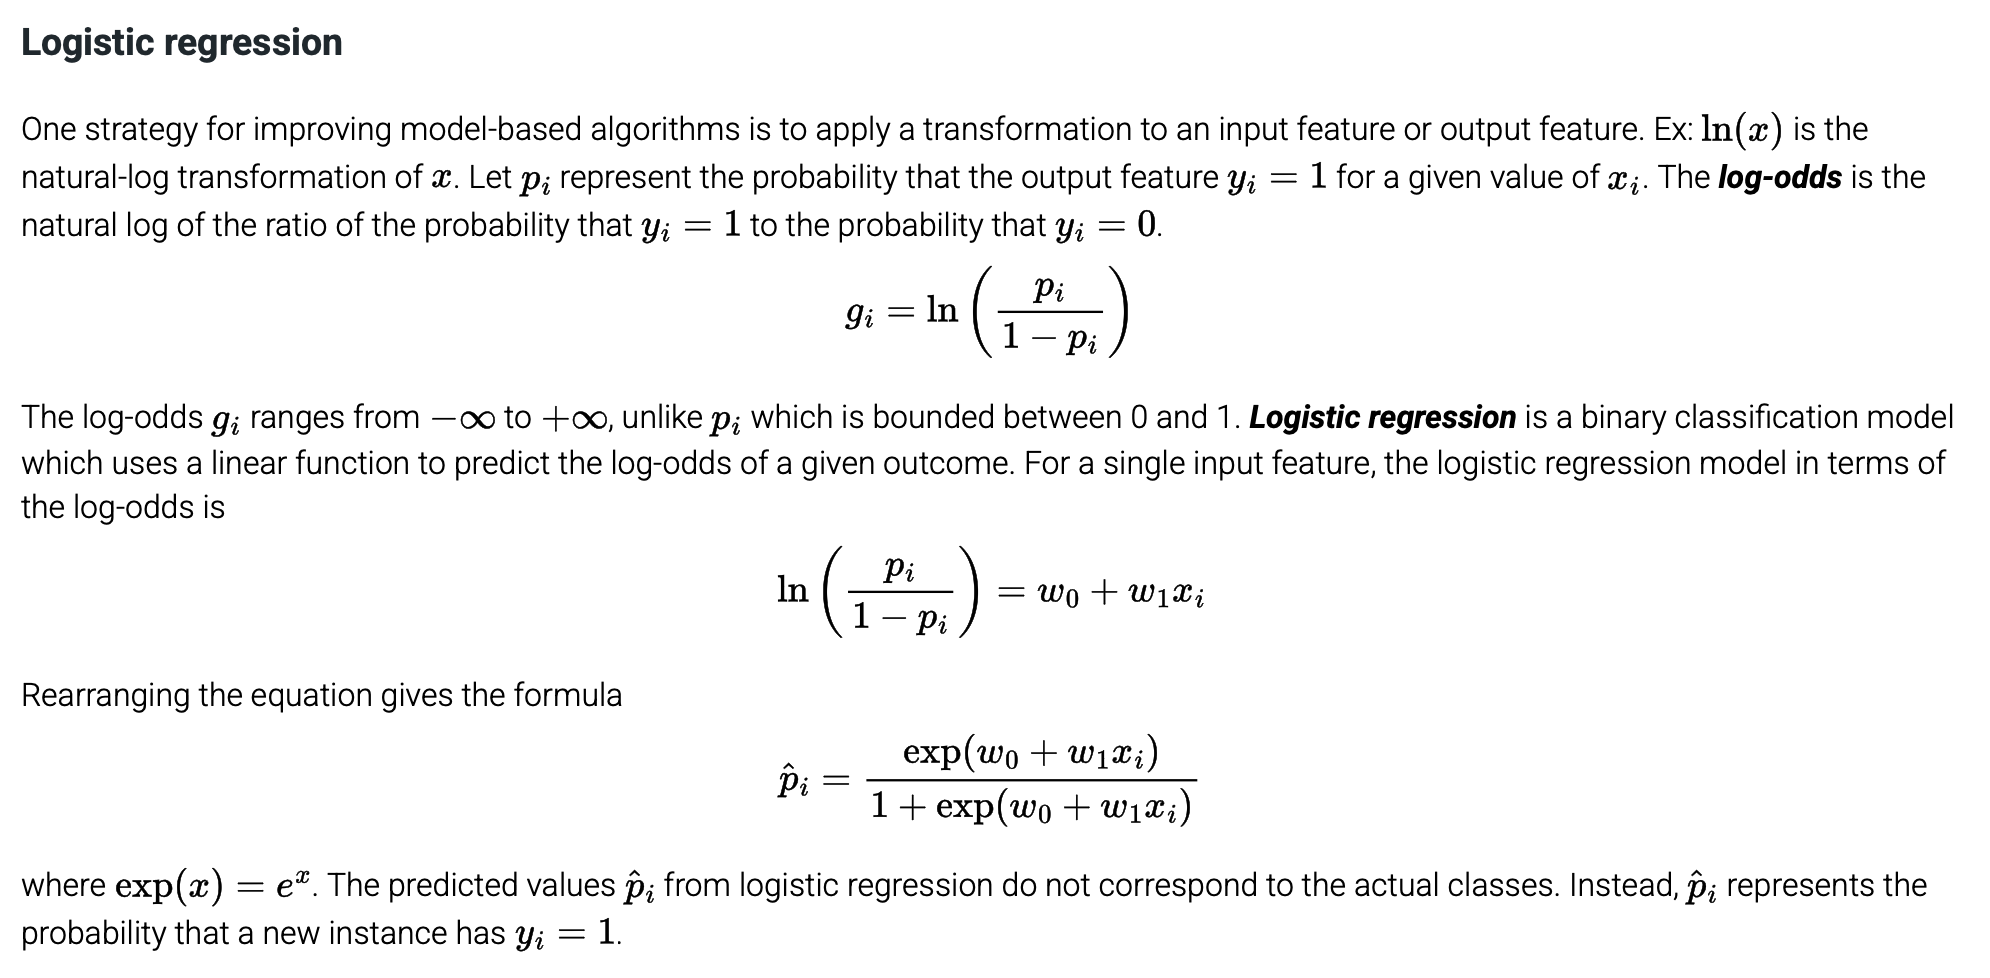

In [43]:
#Logistic Regression

log_reg = LogisticRegression() # fill the blank
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 1.0


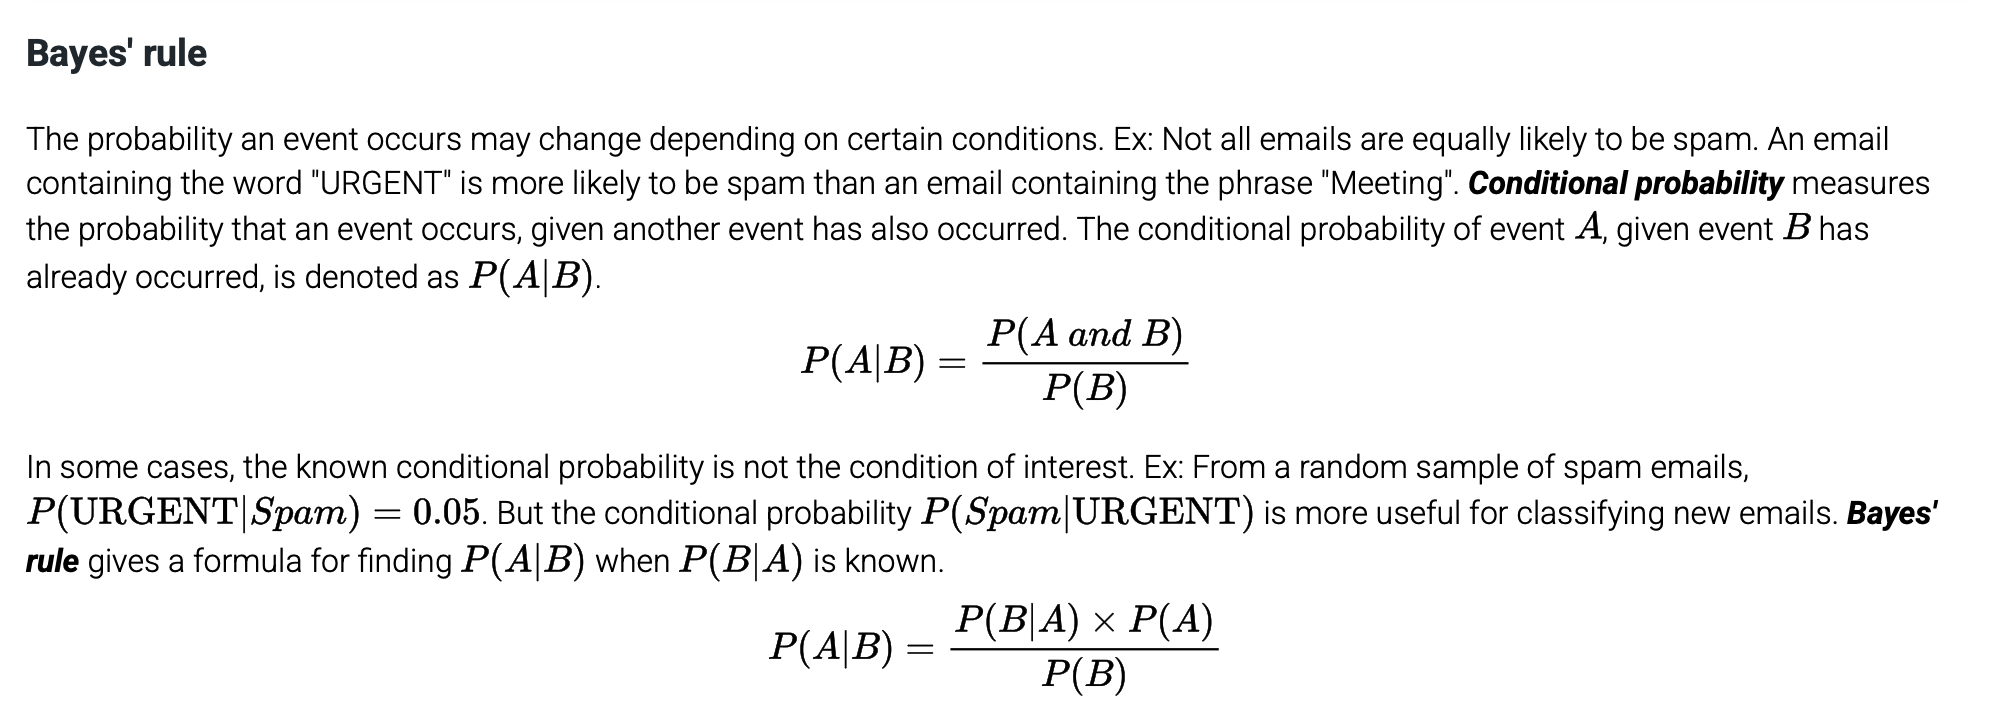

In [44]:
## Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 1.0


In [45]:
# Print classification reports for each model


models = {"KNN": y_pred_knn, "Decision Tree": y_pred_dt, "Random Forest": y_pred_rf, "Logistic Regression": y_pred_lr, "Naive Bayes": y_pred_nb}
for model_name, y_pred in models.items():
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))









Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1 